In [23]:
import os, sys
import toml
import argparse
from munch import Munch, munchify

PROJ_DIR = os.path.expanduser("~/GitWS/Transmisstion-Phase")
DATA_DIR = os.path.join(PROJ_DIR, "data")
SRC_DIR = os.path.join(PROJ_DIR, "src")
LOGS_DIR = os.path.join(PROJ_DIR, "logs", "exp1")
SCRIPTS_DIR = os.path.join(PROJ_DIR, "scripts")
CHECKPOINTS_DIR = os.path.join(PROJ_DIR, "data")
RESULTS_DIR = os.path.join(PROJ_DIR, "results")

sys.path.append(PROJ_DIR)

In [24]:
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
from torchvision import datasets, transforms
DATASET = 'MNIST'
INDEX = 100

In [25]:
npz_fname = os.path.join(DATA_DIR, DATASET, "GradMatrix", f"{INDEX}.npz")
grad_matrix = np.load(npz_fname)['data'].astype(np.float64)

In [26]:
ratio_list = []
assert grad_matrix.shape[1] == grad_matrix.shape[2]
dim = grad_matrix.shape[1]
dia = np.diag_indices(dim)
for i in range(grad_matrix.shape[0]):
    grad_matrix_i = grad_matrix[i]
    dia_sum = np.sum(np.abs(grad_matrix_i[dia]))
    off_sum = np.sum(np.abs(grad_matrix_i)) - dia_sum
    ratio_list.append(dia_sum / off_sum)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

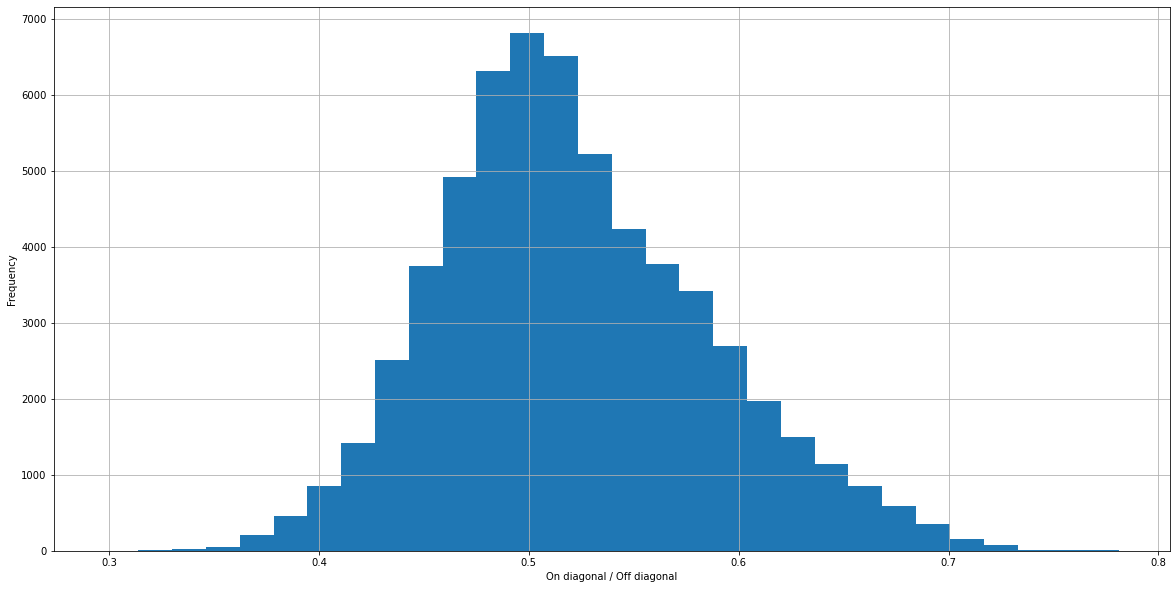

In [28]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(np.asarray(ratio_list), density=False, bins=30)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('On diagonal / Off diagonal')
plt.grid()